# Задания:
    
1. Загрузить файл hr.csv (можно найти во сложении к заданию)
2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
3. Рассчитать и визуализировать корреляционную матрицу для переменных
4. Визуализировать несколько взаимосвязей между переменными
5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными
6. Рассчитать сколько работников работает в каждом департаменте
7. Показать распределение сотрудников по зарплатам
8. Показать распределение сотрудников по зарплатам совместно с департаментами
9. Сколько сотрудников покинули компанию
10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing

# 1. Загрузить файл hr.csv (можно найти во сложении к заданию)

In [12]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [13]:
df.drop(['salary','sales'], axis=1, inplace=True)

In [14]:
stat_df = df.describe().iloc[[1,2,3,7],:]
stat_df.loc['median'] = df.median()
df.mode().head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0


In [15]:
stat_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000
median,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000


# 3. Рассчитать и визуализировать корреляционную матрицу для переменных

In [16]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [18]:
corr = df.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


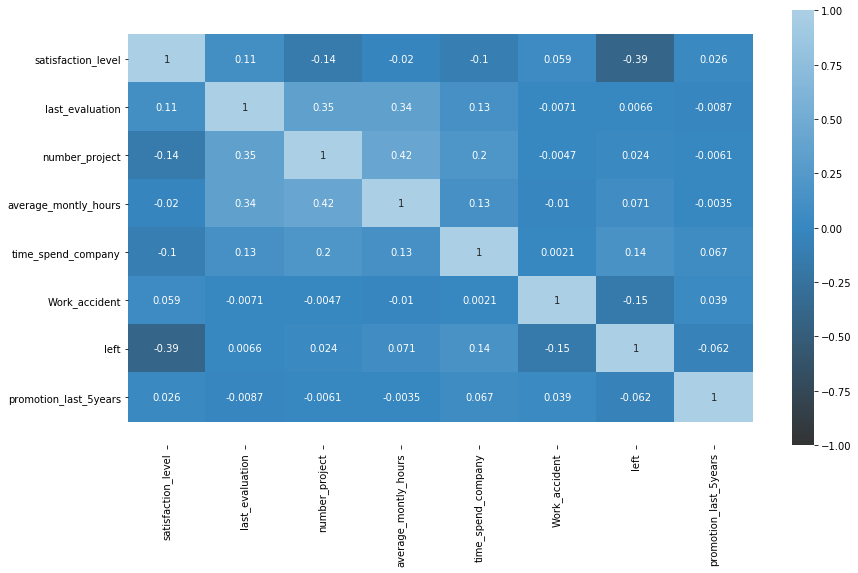

In [23]:

corr_matrix = round(df.corr(), 6)
fig, ax = plt.subplots(figsize=(14, 8))
x = sns.heatmap(corr_matrix, cmap=sns.color_palette("Blues_d", 1000), vmin=-1, center=0, annot=True)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)
plt.show()

Самая большая прямая корреляция между признаками last_evaluation, number_project, average_montly_hours, это ожидаемо. Чем больше люди берут проектов в работу, тем больше они тратят часов на работу и чаще получают оценки своей работы от руководства.

Самая большая обратная корреляция наблюдается между left и satisfaction_level. Чем меньше уровень удовлетворенности сотрудников тем больше они покидают компанию.

Сильной корреляции между показателями не наблюдается

# 4. Визуализировать несколько взаимосвязей между переменными

Text(0, 0.5, 'Кол-во инцидентов')

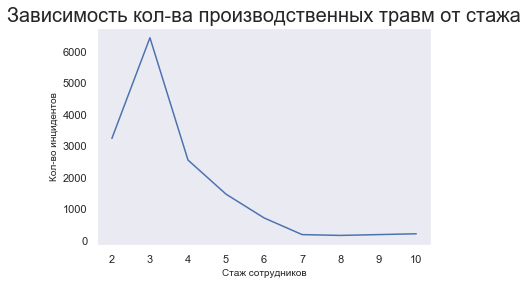

In [58]:
accident_per_year = df.groupby('time_spend_company', as_index=False) \
    .aggregate({'Work_accident':'count'}) \
    .sort_values(by='Work_accident',ascending=False)
sns.set(style="dark")
sns.lineplot(x="time_spend_company", y="Work_accident",
             data=accident_per_year)
plt.title('Зависимость кол-ва производственных травм от стажа', fontsize=20)
plt.xlabel('Стаж сотрудников', fontsize=10)
plt.ylabel('Кол-во инцидентов', fontsize=10)

Здесь можно увидеть, что у сотрудников с малым стажем как правило возникают проблемы с производственными травмами, чем у сотрудников, с большим стажем. Необходимы дополнительные инструктажи со стороны сотрудников в отделе по охране труда.

Text(0, 0.5, 'Уровень удовлетворенности')

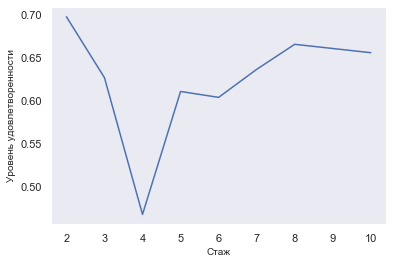

In [59]:
data_df = df.groupby('time_spend_company').mean()['satisfaction_level']
data_df.plot()
plt.xlabel('Стаж', fontsize=10)
plt.ylabel('Уровень удовлетворенности', fontsize=10)

Можно увидеть, что самый низкий уровень удовлетворенности находится на 4-х годах стажа. Скорее всего это связано либо с  профессиональным "выгоранием", либо с отсутствием успехов в карьерной лестнице (не повышают зп)

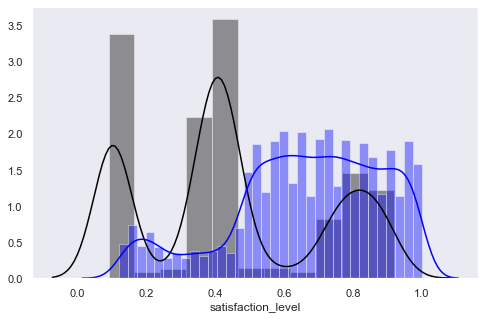

In [76]:
plt.figure(figsize=(8, 5))
sns.distplot(df[df['left'] == 1]['satisfaction_level'], label='Уволенные', color='Black')
sns.distplot(df[df['left'] == 0]['satisfaction_level'], label='Работающие', color='Blue')

Чем ниже показатель удовлетворенности работника своей работой, тем больше вероятность того, что он уволится

# 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [80]:
stats.ttest_ind(df[df['left'] == 1]['average_montly_hours'], df[df['left'] == 0]['average_montly_hours'])

Ttest_indResult(statistic=8.752254731850009, pvalue=2.3113035567540143e-18)

Проверка нулевойгипотезы о том, что загруженность не влияет на решение об увольнении, показала, что p-value равно 2.3113035567540143e-18, это намного меньше стандартной альфа ошибки 0.05, поэтому мы отвергаем нулевую гипотезу и говорим, что решение об увольнение зависит от загруженности сотрудника

Text(0, 0.5, 'Количество сотрудников')

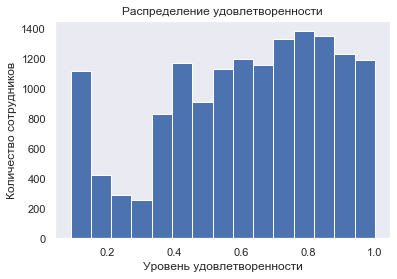

In [63]:
plt.hist(df['satisfaction_level'], 15)
plt.grid(False)
plt.title('Распределение удовлетворенности')
plt.xlabel('Уровень удовлетворенности')
plt.ylabel('Количество сотрудников')

In [67]:
stats.ttest_ind(df[df['salary'] == 'low']['satisfaction_level'], df[df['salary'] == 'high']['satisfaction_level'] )

Ttest_indResult(statistic=-4.76273109535092, pvalue=1.9413281282548522e-06)

In [68]:
stats.ttest_ind(df[df['salary'] == 'low']['satisfaction_level'], df[df['salary'] == 'medium']['satisfaction_level'] )

Ttest_indResult(statistic=-4.928592335569859, pvalue=8.378854439781171e-07)

In [69]:
stats.ttest_ind(df[df['salary'] == 'medium']['satisfaction_level'], df[df['salary'] == 'high']['satisfaction_level'] )

Ttest_indResult(statistic=-2.081861364315287, pvalue=0.03738816176204982)

Уровень удовлетворенности зависит от уровня заработной платы

# 6. Рассчитать сколько работников работает в каждом департаменте

In [81]:
df_work = df[df['left']==0]

In [88]:
dep_nm = list(df_work['sales'].value_counts(ascending=False).index)
size_of_dep_list = list(df_work['sales'].value_counts(ascending=False))
for i in range(len(dep_nm)):
    print('{} - {}, {:.2%}'
          .format(dep_nm[i].capitalize(), size_of_dep_list[i], size_of_dep_list[i]/len(df_work)))

Sales - 3126, 27.35%
Technical - 2023, 17.70%
Support - 1674, 14.65%
It - 954, 8.35%
Product_mng - 704, 6.16%
Randd - 666, 5.83%
Marketing - 655, 5.73%
Accounting - 563, 4.93%
Management - 539, 4.72%
Hr - 524, 4.59%


Больше всего сотрудников работает в отделе продаж, техническом департаменте и поддержке, меньше всего в бухгалтерии, HR и менеджменте

# 7.Показать распределение сотрудников по зарплатам

Text(0, 0.5, 'Кол-во сотрудников')

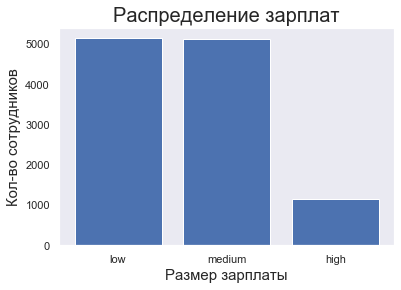

In [92]:
df_work = df_work.groupby('salary', as_index=False) \
    .aggregate({'left':'count'}) \
    .sort_values(by='left', ascending=False)

plt.bar(df_work['salary'], df_work['left'])
plt.title('Распределение зарплат', fontsize=20)
plt.xlabel('Размер зарплаты', fontsize=15)
plt.ylabel('Кол-во сотрудников', fontsize=15)

Сотрудники в основном получают либо среднюю зарплату, либо низкую, больше 5 тыс человек на каждом уровне зарплаты. 
Высокую зарплату получают чуть более 1 тыс человек.

# 8. Показать распределение сотрудников по зарплатам совместно с департаментами

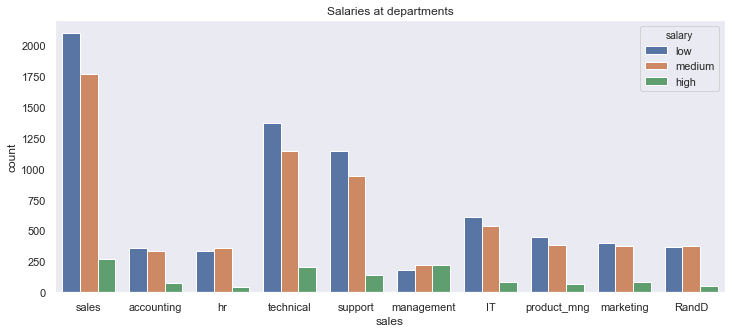

In [93]:
plt.figure(figsize=(12,5))
sns.countplot(x='sales',hue='salary',data=df)
plt.xticks(rotation=0)
plt.title('Salaries at departments')
plt.show()

Видно, что в менеджменте примерно равное кол-во сотрудников на всех уровнях ЗП, также в HR и RandD заметно выше сотрудников со средним уровне ЗП, остальные департаменты распределены примерно одинаково

# 9. Сколько сотрудников покинули компанию

In [95]:
print('Покинули компанию: {}, {:.2%}'.format(len(df[df['left']==1]), len(df[df['left']==1])/len(df)))

Покинули компанию: 3571, 23.81%


# 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

Text(0.5, 0, 'Уровень удовлетворенности')

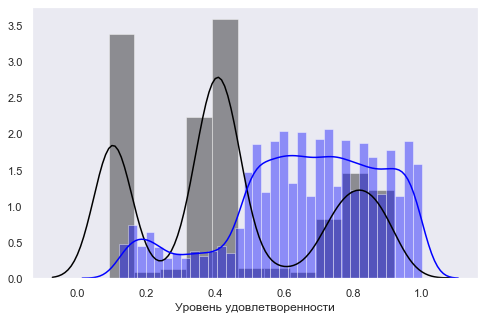

In [101]:
plt.figure(figsize=(8, 5))
sns.distplot(df[df['left'] == 1]['satisfaction_level'], label='Уволенные', color='Black')
sns.distplot(df[df['left'] == 0]['satisfaction_level'], label='Работающие', color='Blue')
plt.xlabel('Уровень удовлетворенности')

Уровень удовлетворенности ушедших сотрудников

In [108]:
df[df['left'] == 1]['satisfaction_level'].mean()

0.44009801176140917

Уровень удовлетворенности работающих сотрудников

In [103]:
df[df['left'] == 0]['satisfaction_level'].mean()

0.666809590479516

Чем ниже показатель удовлетворенности работника своей работой, тем больше вероятность того, что он уволится

In [99]:
stats.ttest_ind(df[df.promotion_last_5years == 1]['left'], df[df.promotion_last_5years == 0]['left'] )

Ttest_indResult(statistic=-7.581195349367636, pvalue=3.6240472241469694e-14)

Сотрудники без повышения в течение последних 5 лет увольняются чаще

In [100]:
stats.ttest_ind(df[df.time_spend_company > 4]['left'], df[df.time_spend_company <= 4]['left'] )

Ttest_indResult(statistic=19.350735172803166, pvalue=2.0275102553909982e-82)

Сотрудники с большим стажем увольняются значительно реже